# **Object Detection with Yolov8 Model**

🐱 Github: https://github.com/NicholasConsiglio1201/Basketball_Tracking/tree/main/Testing_Videos

**Object Detection:** The use of Machine Learning to identify and classify objects found in images, videos, or live footage.

**Object Tracking:** The use of Machine Learning to track the movement of objects found in images, videos, or live footage.

**Goal:** Be able to recognize different objects and say "Hey! That is a **player** or that is a **basketball**." We also want to be able to track the ***movement of the basketball*** as well.

**Note**: *Google Collab* will be used for this notebook since there are some dependencies that do not allow the **ultralytics** package to be able to be used in a *Jupyter Notebook*. One thing that is important to remember is that unlike a Jupyter Notebook, a Collab notebook **ALWAYS** requires you to re-run your installations.

### **How does a Yolo Model Work?**

**1.)** Divides an image into a grid, with equal cut spaces.

**2.)** For each square on the grid, the model quickly looks to see if there
is an identifiable object in it. It only looks at each square once. (Hence the name)

**3.)** If the model finds something, it draws a bounding box around the identified object.

**4.)** Once the bounding box is created, the model attempts to predict what the label should be for the identified object. Provides a confidence score of how confident it is for the object to be in the specific class.

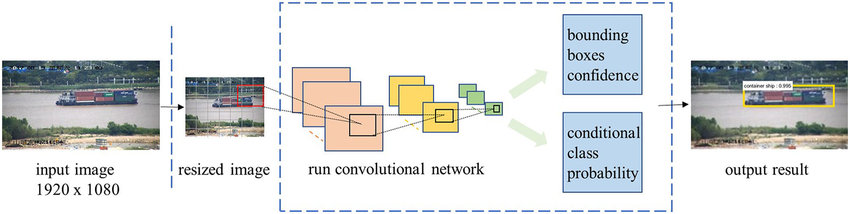

## Installations and Imports
**Ultralytics:** --> Open-Source package designed for **Object Detection**, **Image Segmentation**, and **Model Training** using the **YOLO** (*You Only Look Once*) family of models. Specifically with this notebook, we will be using the **Yolov8 Model.**

**cv2**: --> Open-Source package used for **Computer Vision** and **Image Processing** Tasks. This is what we are gonna use for **tracking the movement of the basketball**.

In [5]:
# Install the Ultralytics Package
#!pip install ultralytics

When coding in Google Collab, we can hide our output with the 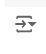
image that is seen right below the code text number. This helps us with keeping our notebook organized and only showing the output we want to show.

In [ ]:
# Imports that are used for the Notebook
from ultralytics import YOLO
# This is our Computer Vision Library enabling us to do Object Tracking
import cv2
# This allows us to track the basketball by utilizing a Sort Algorithm
from collections import deque
import pandas as pd

# **Task 1: Basic Yolov8 Model**

To begin, we first want to start with just being able to see what a basic pre-trained Yolov8 Model does. When using the **Basic Yolov8 Model** built inside of the *Ultralytics* package, it is already trained on **80 different classes** and "*Person*" is one of them! We do not need to do anything complicated at the moment. All we need to do is just run the two lines of code below and we are all set to do some **Object Detection!**

Before we begin, we are going to want to download 3 video files from the **Github Repository** which has a link at the top of this notebook. These videos will be our testing videos of our models throughout the notebook.

In [6]:
# Loading in a Basic Yolov8 Model built inside of Ultralytics
basic_model = YOLO('yolov8n.pt')

After running the code above, the video has now been labeled and it has been saved to the ***runs/detect/predict*** path.

# **Task 2: Train our Own Model to Detect the Basketball**

With this task, things begin to get a lot harder and take longer to do than **Task 1.** When creating our own model, there are steps that we need to take in order to create a successful model.

Steps to Success:
* **1.)** Gather at least **300 Images** of whatever it is you want your model to detect. (**600 Images** were gathered and trained on the model we will see shortly.) Save all of these images in some folder or repository where they can be easily accessible. These images must also **ONLY be JPEG or PNG** images. **JFIF or WEBP** images will not work.
* **2.)** **Annotate** and **Label** all of your images and save these labels in the same directory where the images are stored. For Data Annotation the website **CVAT** will be used.  https://www.cvat.ai/ (*Will probably need to be re-directed*)
* **3.)** Ensure the *data.yaml* file is correctly configured. This file is basically in charge of getting everything straightened out so your model will be trained properly.
* **4.)** Finally, train the model! At minimum, train it for **50 epochs**.

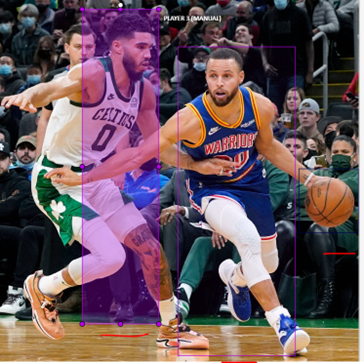

**Important Note:** The more images you have the more labeling you need to do...BUT the better your model will be! 😀

**Side Note:** This process will not be covered in this notebook, that was just a very shallow outline of what is done. There will be a more in-depth process in the Github Repository.

**TO MAKE THINGS EASIER, THE BEST MODEL IS ALREADY CREATED AND FOUND IN GITHUB.**
- This best model must be downloaded and imported into the Collab Workbook.

In [7]:
# Running our "basic_model" on the "1v1_shot_made.MOV" video
results = basic_model(source = '1v1_shot_made.MOV', conf = 0.70, save = True, classes = 0)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/962) /content/1v1_shot_made.MOV: 384x640 2 persons, 385.6ms
video 1/1 (frame 2/962) /content/1v1_shot_made.MOV: 384x640 2 persons, 152.9ms
video 1/1 (frame 3/962) /content/1v1_shot_made.MOV: 384x640 2 persons, 145.1ms
video 1/1 (frame 4/962) /content/1v1_shot_made.MOV: 384x640 2 persons, 153.8ms
video 1/1 (frame 5/962) /content/1v1_shot_made.MOV: 384x640 2 persons, 135.4ms
video 1/1 (frame 6/962) /content/1v1_shot_made.MOV: 384x640 2

In [ ]:
# Saving our newly trained model
our_model = YOLO('/content/best_model.pt')

In [ ]:
# Testing our New Model
results = our_model(source = 'Nick_Shooting_Free.MOV', show = True, conf = 0.40, save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/761) /content/Nick_Shooting_Free.MOV: 384x640 1 Basketball, 1 Player, 144.4ms
video 1/1 (frame 2/761) /content/Nick_Shooting_Free.MOV: 384x640 1 Basketball, 1 Player, 161.0ms
video 1/1 (frame 3/761) /content/Nick_Shooting_Free.MOV: 384x640 1 Basketball, 1 Player, 162.6ms
video 1/1 (frame 4/761) /content/Nick_Shooting_Free.MOV: 384x640 1 Basketball, 1 Player, 14

After running the code above, we should now have successfully applied our model to a different video. Let's see the results by downloading the file that was outputted in the **runs/detect/predict2** path.

Awesome! It looks like we can finally detect the **Basketball** and the **Person** label from the first model has now been changed to **Player**.

# **Task 3: Tracking the Movement of the Basketball**

Now that we can successfully detect the **Basketball** and the **Players**, it is time to begin tracking the **Movement of the Basketball.** Let's continue using our Model that we trained from **Task 2** for **Task 3**.

In [24]:
# Creating a variable for the video path and loading in the video we want to Track
video_path = 'Passing_Ball.MOV'
# The 'VideoCapture()' method opens the video file that we are trying to analyze
cap = cv2.VideoCapture(video_path)

# Getting the Video Properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# If FPS is misread of set to 0, set a default FPS
if fps == 0 or fps is None:
  fps = 30

# Setting up the Video Writer to save the Output Video
output_path = 'tracking_basketball.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# A Deque is used to store the center positions of detected basketballs for 40 frames
basketball_positions = deque(maxlen = 40) # Only keep the last 40 frames of positions
basketball_positions_list = []

# Looping through each frame of the video
while cap.isOpened():
  ret, frame = cap.read()

  # If the video has ended, break the loop
  if not ret:
    break

  # Running our YOLOv8 Model on the Frame (Returning our Predictions)
  results = our_model(frame)

  # Iterate over the Detected Objects
  for result in results:
    boxes = result.boxes
    for box in boxes:
      # Getting the Class ID and Confident Score
      class_id = int(box.cls.cpu().numpy()[0])
      confidence = box.conf.cpu().numpy()[0]
      x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())

      # Preparing the label text and color based on class ID
      if class_id == 0:
        label = f'Basketball:{confidence:.2f}'
        color = (0, 255, 0) # Green color for basketball
        # Calculating the center of the bounding box and storing it for 60 frames
        center_x = int((x1 + x2) / 2)
        center_y = int((y1 + y2) / 2)
        basketball_positions.append((center_x, center_y))
        # Store the frame number and ball center coordinates
        basketball_positions_list.append((cap.get(cv2.CAP_PROP_POS_FRAMES), center_x, center_y))

      elif class_id == 1:
        label = f'Player:{confidence:.2f}'
        color = (255, 0, 0) # Blue for Player

      # Drawing the Bounding Box
      cv2.rectangle(frame, (x1, y1), (x2, y2), color = color, thickness = 3)

      # Put the label text above the bounding box
      label_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]
      label_y1 = max(y1 - 10, 0)
      label_x1 = x1
      cv2.rectangle(frame, (label_x1, label_y1 - label_size[1]),
                    (label_x1 + label_size[0], label_y1), color, -1) # Background for Text
      cv2.putText(frame, label, (label_x1, label_y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) # White Text

    # Drawing circles for all the sorted basketball positions (last 60 frames)
    for (center_x, center_y) in basketball_positions:
      cv2.circle(frame, (center_x, center_y), radius = 15, color = (0, 255, 0), thickness = 3)

    # Write the processed frame to the output video
    out.write(frame)

# Release the Video Objects
cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 1 Basketball, 125.6ms
Speed: 6.2ms preprocess, 125.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Basketball, 122.6ms
Speed: 3.6ms preprocess, 122.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Basketball, 1 Player, 119.1ms
Speed: 3.6ms preprocess, 119.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Basketball, 1 Player, 130.2ms
Speed: 3.6ms preprocess, 130.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Basketball, 1 Player, 124.4ms
Speed: 3.8ms preprocess, 124.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Basketball, 1 Player, 142.6ms
Speed: 3.5ms preprocess, 142.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Basketball, 2 Players, 140.9ms
Speed: 4.5ms preprocess, 140.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Basketball,

In [ ]:
# Getting the Proper Coordinates
coordinates_df = pd.DataFrame(basketball_positions_list)
coordinates_df.rename({0:'Frame', 1:'X-Coordinate', 2:'Y-Coordinate'}, axis = 1, inplace = True)
coordinates_df.head()

,Frame,X-Coordinate,Y-Coordinate
0,1.0,405,577
1,2.0,403,563
2,3.0,400,553
3,4.0,398,550
4,5.0,397,549


# **Conclusion**

There are so many different things that can be done with **Object Detection** and **Object Tracking** and this notebook is just an example of that! Hopefully this introduction has driven some inspiration to digging deeper into these topics!